### Imports

In [1]:
from langgraph.graph import StateGraph, START, END
from langchain_google_genai import ChatGoogleGenerativeAI
from typing import TypedDict
from dotenv import load_dotenv

In [2]:
load_dotenv()

True

### State

In [3]:
class LLMState(TypedDict):
    topic: str
    outline: str
    blog: str
    score: int

### Node Functions

In [4]:
def OutlineWorkflow(state: LLMState) -> LLMState:
    model = ChatGoogleGenerativeAI(
        model="gemini-2.0-flash",
        temperature=0.5
    )
    prompt = f"Write a detailed outline for the topic: {state['topic']}"
    outline = model.invoke(prompt)
    state["outline"] = outline.content
    return state

In [5]:
def BlogWorkflow(state: LLMState) -> LLMState:
    model = ChatGoogleGenerativeAI(
        model="gemini-2.0-flash",
        temperature=0.5
    )
    prompt = f"Write a blog for the topic: {state['topic']} \n Outline:{state['outline']}"
    blog = model.invoke(prompt)
    state["blog"] = blog.content
    return state

In [6]:
def EvaluateWorkflow(state: LLMState) -> LLMState:
    model = ChatGoogleGenerativeAI(
        model="gemini-2.0-flash",
        temperature=0.5
    )
    prompt = f"Evaluate the blog and give a score from 1-100 for the outline: {state['outline']} \n Blog: {state['blog']} \n Only provide the score as an integer."
    score = model.invoke(prompt)
    state["score"] = int(score.content)
    return state

### Define Graph

In [7]:
graph = StateGraph(LLMState)

### Add Nodes

In [8]:
graph.add_node("OutlineWorkflow", OutlineWorkflow)
graph.add_node("BlogWorkflow", BlogWorkflow)
graph.add_node("EvaluateWorkflow", EvaluateWorkflow)

### Add Edges

In [9]:
graph.add_edge(START, "OutlineWorkflow")
graph.add_edge("OutlineWorkflow", "BlogWorkflow")
graph.add_edge("BlogWorkflow", "EvaluateWorkflow")
graph.add_edge("EvaluateWorkflow", END)

### Compile Graph

In [10]:
workflow = graph.compile()

### Run

In [11]:
output = workflow.invoke({
    "topic": "How to use LangGraph for prompt chaining"
})

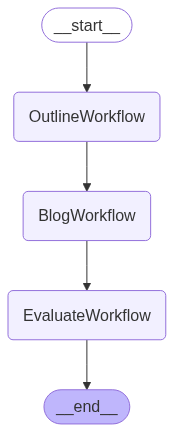

In [12]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [13]:
print(output)

{'topic': 'How to use LangGraph for prompt chaining', 'outline': "## Outline: How to Use LangGraph for Prompt Chaining\n\n**I. Introduction (5-10% of content)**\n\n   *   **A. What is Prompt Chaining?**\n        *   1. Definition: Connecting multiple prompts and LLMs to achieve a complex task.\n        *   2. Benefits:\n            *   a. Improved accuracy and reliability.\n            *   b. Ability to handle complex tasks beyond a single prompt.\n            *   c. Increased modularity and reusability.\n            *   d. Reduced hallucination.\n        *   3. Examples of use cases:\n            *   a. Question answering over large documents.\n            *   b. Code generation with iterative refinement.\n            *   c. Dialogue agents with memory and planning.\n            *   d. Data analysis and report generation.\n\n   *   **B. Introduction to LangGraph**\n        *   1. What is LangGraph?\n            *   a. A Python library for building stateful, multi-actor applications us